<a href="https://colab.research.google.com/github/Francofus/IMSE441/blob/main/IMSE_441_Final_Project(FF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv"
Data = pd.read_csv(url)
Data.head()

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USD,US,100,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,USA,M,48


In [148]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                115 non-null    int64 
 1   experience_level    115 non-null    object
 2   employment_type     115 non-null    object
 3   job_title           115 non-null    object
 4   salary              115 non-null    int64 
 5   salary_currency     115 non-null    object
 6   employee_residence  115 non-null    object
 7   remote_ratio        115 non-null    int64 
 8   company_location    115 non-null    object
 9   company_size        115 non-null    object
 10  age                 115 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 10.0+ KB


In [149]:
Data.isnull().sum() 

year                  0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
age                   0
dtype: int64

In [150]:
Data.nunique()

year                   2
experience_level       4
employment_type        4
job_title             15
salary                97
salary_currency        5
employee_residence    10
remote_ratio           3
company_location       2
company_size           3
age                   35
dtype: int64

**2.)**

In [151]:
Data.drop(['salary_currency','employee_residence','remote_ratio'],axis=1,inplace=True)
Data.head()

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USA,M,48


In [152]:
df = Data['job_title'].value_counts()['Analytics Engineer']
df

6

In [153]:
mean_salary_analytics_engineer = Data.loc[Data['job_title'] == 'Analytics Engineer', 'salary'].mean()
mean_salary_analytics_engineer

190991.66666666666

<BarContainer object of 6 artists>

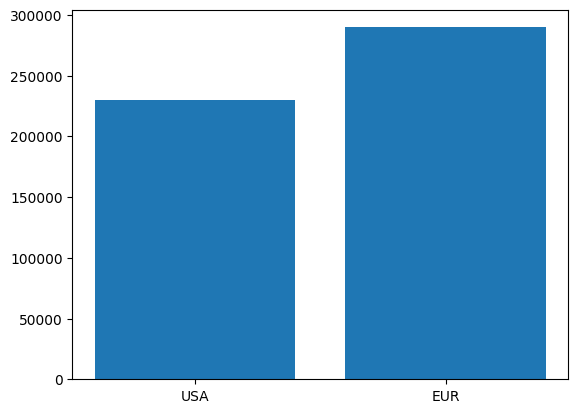

In [154]:
df=Data.loc[Data['job_title'] == 'Analytics Engineer']
plt.bar(df['company_location'], df['salary'])


**4.)**

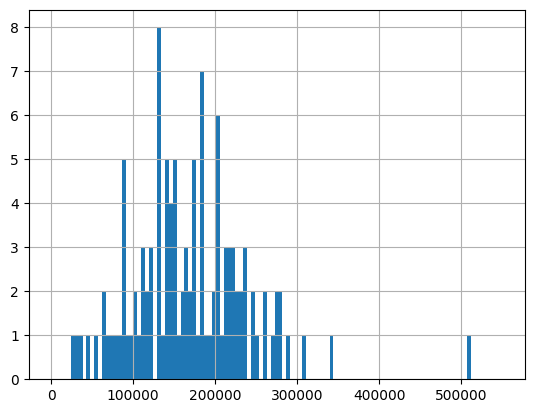

In [155]:
Data['salary'].hist(bins=115, range=(0,550000))
plt.show()

**5.)**

In [156]:
g= Data.groupby('job_title').size()
g

job_title
Analytics Engineer                 6
Applied Scientist                  8
Business Intelligence Engineer     4
Computer Vision Engineer           4
Data Analyst                      10
Data Architect                     2
Data Engineer                     30
Data Modeler                       2
Data Scientist                    29
Data Strategist                    2
ML Engineer                        2
Machine Learning Engineer          8
Principal Data Scientist           1
Research Engineer                  6
Research Scientist                 1
dtype: int64

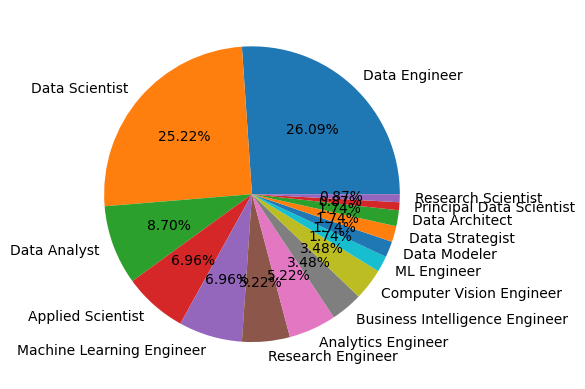

In [157]:
job_counts = Data['job_title'].value_counts()
plt.pie(job_counts, labels=job_counts.index, autopct='%.2f%%')
plt.show()

**6.)**

In [158]:
high_salary = Data[Data['salary']>400000].head(2)
high_salary

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
39,2022,MI,FL,Machine Learning Engineer,1650000,USA,L,57
78,2023,MI,FL,Data Scientist,510000,USA,L,32


**7.)**

<Axes: title={'center': 'salary'}, xlabel='year'>

<Figure size 10000x6000 with 0 Axes>

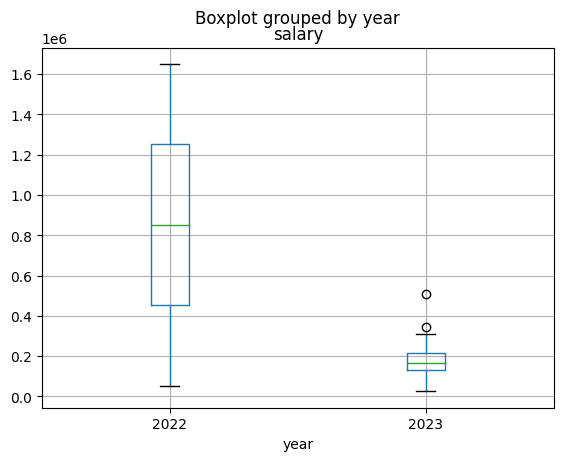

In [159]:
plt.figure(figsize=(100, 60))
Data.boxplot(column='salary', by='year')


**8.)**

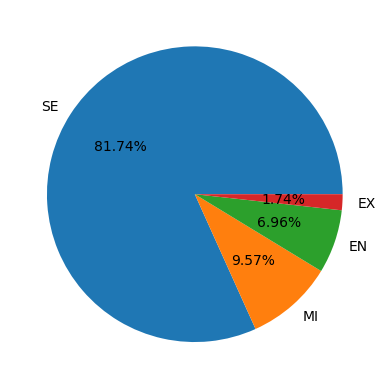

In [160]:
#A)
exp_level = Data['experience_level'].value_counts()
plt.pie(exp_level, labels=exp_level.index, autopct='%.2f%%')
plt.show()

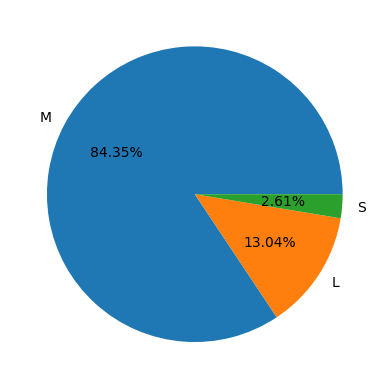

In [161]:
#B)
comp_size = Data['company_size'].value_counts()
plt.pie(comp_size, labels=comp_size.index, autopct='%.2f%%')
plt.show()

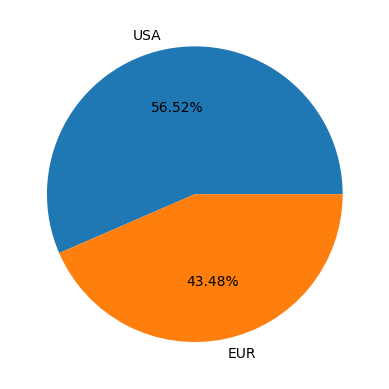

In [162]:
#C)
comp_loc = Data['company_location'].value_counts()
plt.pie(comp_loc, labels=comp_loc.index, autopct='%.2f%%')
plt.show()

**9.)**

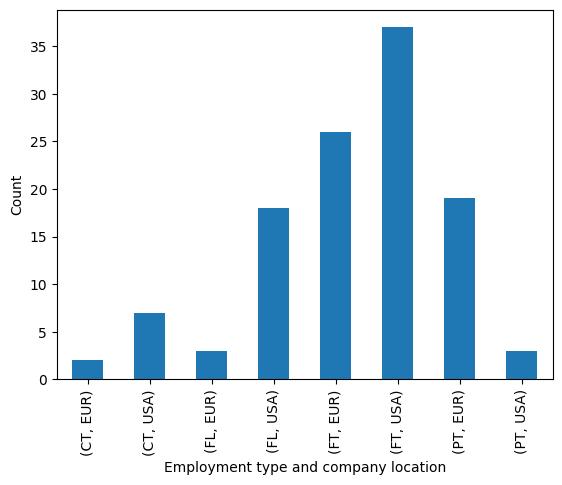

In [171]:
#a)
Emp_vs_Loc=Data.groupby(['employment_type', 'company_location']).size()
Emp_vs_Loc.plot(kind='bar', stacked=True)
plt.xlabel('Employment type and company location')
plt.ylabel('Count')
plt.show()

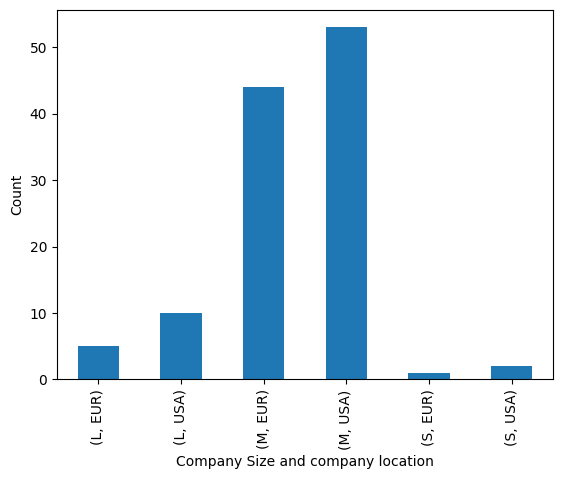

In [172]:
#b)
Size_vs_Loc=Data.groupby(['company_size', 'company_location']).size()
Size_vs_Loc.plot(kind='bar', stacked=True)
plt.xlabel('Company Size and company location')
plt.ylabel('Count')
plt.show()

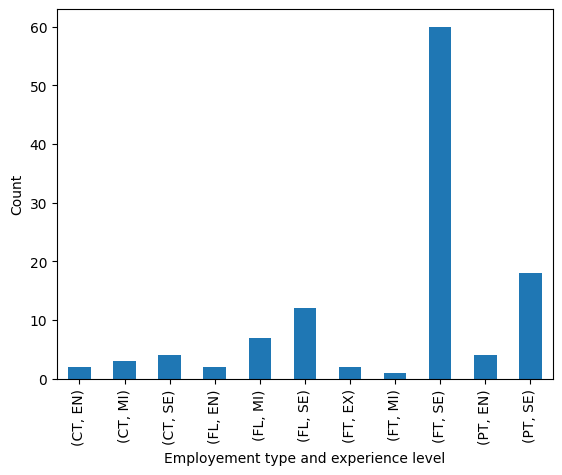

In [174]:
#c)
Emp_vs_Explevel=Data.groupby(['employment_type', 'experience_level']).size()
Emp_vs_Explevel.plot(kind='bar', stacked=True)
plt.xlabel('Employement type and experience level')
plt.ylabel('Count')
plt.show()

**10.)**

In [ ]:
!pip install pingouin
import pingouin as pg

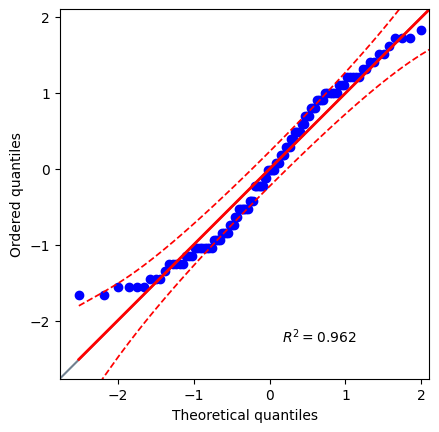

In [178]:
age = Data['age']
pg.qqplot(age)
plt.show()


In [183]:
from scipy.stats import ttest_1samp
from scipy import stats

In [188]:
t_stat, p_value= ttest_1samp(a=age, popmean= 30)
p_value, t_stat

(1.8352675934333261e-22, 12.221906042968829)

In [184]:
CI= stats.ttest_1samp(age,30).confidence_interval(confidence_level=0.96)
CI

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

In [185]:
if p_value < 0.05:
  print("We reject the null hypothesis")

else:
  print("We fail to rejet the null hypothesis")

We reject the null hypothesis


**10.)**

In [191]:
x = Data[['age']]
y = Data[['salary']]
x

,age
0,44
1,51
2,27
3,54
4,48
...,...
110,42
111,51
112,39
113,36


In [193]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [194]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [195]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [[1540.13479365]]
y-intercept  [118586.24015009]


**y = 118586.2401 + 1540.1347*x**

In [196]:
r_sq = model.score(x, y)
r_sq

0.009464708573278524

In [ ]:
y_pred = model.predict(x)
y_pred

In [198]:
import statsmodels.api as sm
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.080
Date:                Wed, 10 May 2023   Prob (F-statistic):              0.301
Time:                        01:47:57   Log-Likelihood:                -1536.8
No. Observations:                 115   AIC:                             3078.
Df Residuals:                     113   BIC:                             3083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.186e+05   6.27e+04      1.890      0.0